# Advanced image processes

&copy; 李浩东 3190104890@zju.edu.cn

- Contour finding
- Contour approximation


# Threshold segmentation

![threshold](./images/threshold.png)


### Steps for threshold segmentation

- The processing mainly consists of two steps
     - Determine segmentation threshold
     - Compare the segmentation threshold with the gray value of the pixel


### The principle of threshold segmentation

- If the grayscale interval of the image $f(x, y)$ is $[Z_{min}, Z_{max}]$, set a threshold $Z_t$ in this interval, and $Z_{min}\leqslant Z_t\leqslant Z_{max}$
- The new gray value of all pixels whose gray value is less than or equal to $Z_t$ in the image is $0$, and the new gray value of pixels greater than $Z_t$ is $1.0/255$
- That is, an output binary image $f_t(x, y)$ is constructed through such threshold segmentation:

$$
f_{t}(x, y)= \begin{cases}1 & f(x, y)>Z_{t} \\ 0 & f(x, y) \leqslant Z_{t}\end{cases}
$$


- The determination of the threshold $Z_t$ can simply select the average value of the maximum grayscale and the minimum grayscale of the image, or the average of all grayscale values, or the threshold can be determined by an ***iterative method***
    - Based on the idea of ***approximation***, the initial threshold is determined according to the statistical results of the gray histogram,
    - Use this threshold to segment the image into target and background, and take the mean of the grayscale averages of the two as the ***new*** threshold
    - Iterate through the loop until the threshold ***difference*** between the two loops is ***very small*** and the loop stops

# Contour extraction

![000](./images/contour_extraction.png)


- The method of ***hollowing out*** the interior points can be used to extract the contour of the binary image. The principle is as follows
     - Assuming that the background color is ***black*** and the target color is ***white***, if there is a pixel in the ***original*** image that is white, and its $8$ ***adjacent points*** are all ***white***, it can be determined that the point is an ***internal*** point, then delete the point, also it's just hollowing out the interior.

- In the binary image, it is assumed that the gray value of the background pixel is $0$, the gray value of the scene pixel is $1$, and the extraction rule of the boundary contour is
     - If the center pixel value is $0$ , regardless of the value of the remaining $8$ adjacent pixels, the center pixel value $0$ will be retained
     - If the center pixel value is $1$ , and the remaining $8$ adjacent pixel values are all $1$ , then change the center pixel value to $0$
     - All except the above, change the center pixel value to $1$

# Polygon approximation of contour

![polygon_approximation_of_contour](./images/polygon_approximation_of_contour.png)


- When we find a contour for shape analysis, we usually need to use a polygon to approximate a contour, so that the number of vertices is reduced
- The `approxPolyDP` function of `OpenCV` can achieve this function
- The `approxPolyDP` function uses the `Douglas-Peucker` algorithm
     - First find the two farthest points from the contour and connect the two points
     - Find a point with the furthest distance from the off-line segment on the original contour, and add this point to the new contour after approximation
     - Then repeat the previous algorithm, iterating until the shortest distance from all points to the polygon is less than the specified precision

(413, 660, 3)


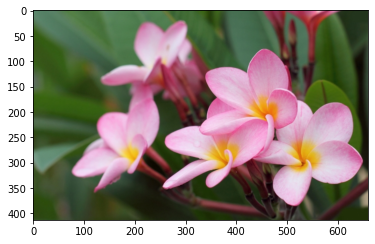

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.colors as mat_color

img_bgr = cv2.imread("./images/beautiful_flower.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
print(img_rgb.shape)
no_norm = mat_color.Normalize(vmin=0, vmax=255, clip=False)
plt.imshow(img_rgb, norm=no_norm)
img_gray = cv2.imread("./images/beautiful_flower.jpg", flags=0)

(413, 660)


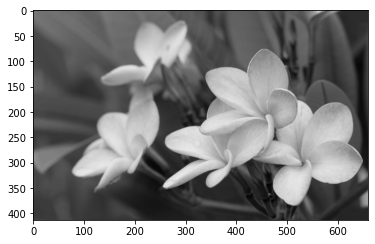

In [2]:
print(img_gray.shape)
plt.imshow(img_gray, "gray", norm=no_norm)

(413, 660)


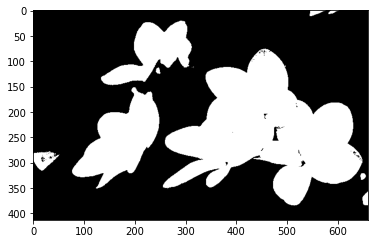

In [3]:
ret, img_bin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
print(img_bin.shape)
plt.imshow(img_bin, "gray", norm=no_norm)

number of contours: 67


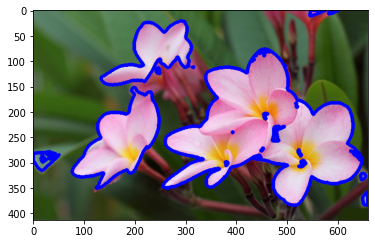

In [4]:
contours, hierarchy = cv2.findContours(img_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  
print("number of contours: " + str(len(contours)))
img_rgb_copy = np.copy(img_rgb)
img_con = cv2.drawContours(img_rgb_copy, contours, -1, (0,0,255), 5)
plt.imshow(img_con, norm=no_norm)

In [5]:
contours = sorted(contours, key=lambda x: len(x))
print("contours length ->", [len(contours[i]) for i in range(len(contours))])
start_index = 0
for index, single_contour in enumerate(contours):
    if len(single_contour) >= 300:
        print("update start_index")
        start_index = index
        break
print("start index ->", start_index)
print("number of contours: " + str(len(contours) - start_index))

contours length -> [1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 8, 8, 9, 10, 10, 10, 10, 11, 12, 12, 15, 16, 17, 19, 21, 25, 27, 42, 72, 293, 325, 787]
update start_index
start index -> 65
number of contours: 2


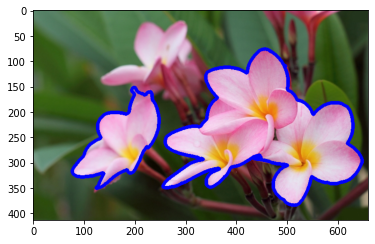

In [6]:
img_rgb_copy = np.copy(img_rgb)
img_con_new = cv2.drawContours(img_rgb_copy, contours[start_index:], -1, (0,0,255), 5)
plt.imshow(img_con_new, norm=no_norm)

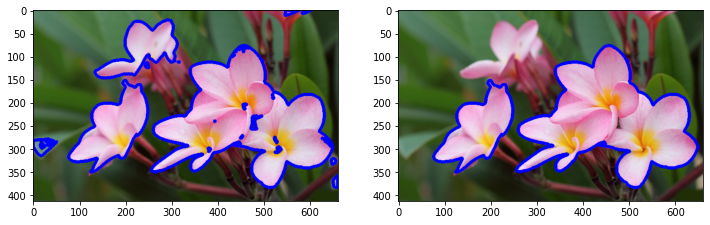

In [7]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_con, norm=no_norm)
plt.subplot(1, 2, 2)
plt.imshow(img_con_new, norm=no_norm)

# Contour approximation

![bounding](./images/bounding.png)


length -> 695.452879190445
length -> 1702.9545282125473


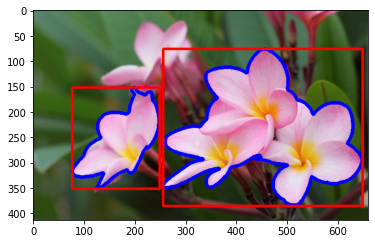

In [8]:
img_rgb_copy = np.copy(img_con_new)
for i in range(len(contours) - start_index):
    x, y, w, h = cv2.boundingRect(contours[i + start_index])
    print("length ->",  cv2.arcLength(contours[i + start_index], True))
    cv2.rectangle(img_rgb_copy, (x, y), (x + w, y + h), (255, 0, 0), 3)
plt.imshow(img_rgb_copy, norm=no_norm)

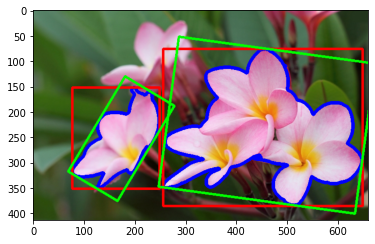

In [9]:
img_copy = np.copy(img_rgb_copy)
for i in range(len(contours) - start_index):
    rect = cv2.minAreaRect(contours[i + start_index])
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    cv2.drawContours(img_copy, [box], 0, (0, 255, 0), 3)
plt.imshow(img_copy, norm=no_norm)

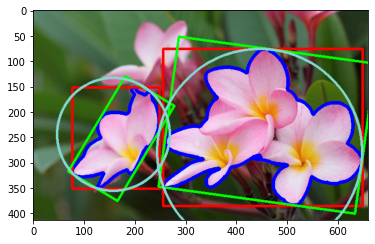

In [10]:
for i in range(len(contours) - start_index):
    (x, y), radius = cv2.minEnclosingCircle(contours[i + start_index])
    center, radius = (int(x), int(y)), int(radius)
    cv2.circle(img_copy, center, radius, (129, 216, 208), 3)
plt.imshow(img_copy, norm=no_norm)

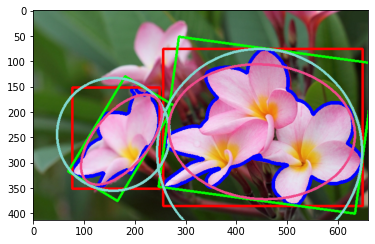

In [11]:
for i in range(len(contours) - start_index):
    ellipse = cv2.fitEllipse(contours[i + start_index])
    cv2.ellipse(img_copy, ellipse, (239, 73, 139), 3)
plt.imshow(img_copy, norm=no_norm)

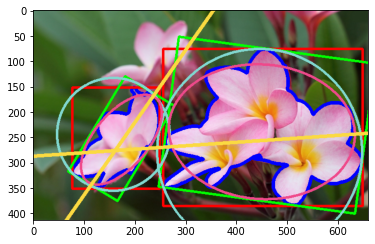

In [12]:
rows, cols = img_copy.shape[:2]
for i in range(len(contours) - start_index):
    [vx, vy, x, y] = cv2.fitLine(contours[i + start_index], 
                                 cv2.DIST_L2, 0, 0.01, 0.01)
    lefty = int((-x * vy / vx) + y)
    righty = int(((cols - x) * vy / vx) + y)
    cv2.line(img_copy, (cols - 1, righty), (0, lefty), (251, 218, 65), 5)
plt.imshow(img_copy, norm=no_norm)

### Polygon & Convex Hull contour approximation 

- Below, in second image, green line shows the approximated curve for epsilon = 10% of arc length. Third image shows the same for epsilon = 1% of the arc length. Third argument specifies whether curve is closed or not.

![approx_1](./images/approx_1.jpg)


- Generally speaking, convex curves are the curves which are always bulged out, or at-least flat. And if it is bulged inside, it is called convexity defects. 
- For example, check the below image of hand. Red line shows the convex hull of hand. The double-sided arrow marks shows the convexity defects, which are the local maximum deviations of hull from contours.

![convex_hand](./images/convex_hand.jpg)
